# **Import các thư viện cần thiết**

In [ ]:
# Import thư viện thao tác input (dataset)
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
# Import các thư viện của Tensorflow/Keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [ ]:
K.clear_session()

In [ ]:
img_width = img_height = 224

training_data_dir = '../input/my-dogs-vs-cats/my-dogs-vs-cats/training'
validation_data_dir = '../input/my-dogs-vs-cats/my-dogs-vs-cats/validation'

batch_size = 32

In [ ]:
# Tăng cường data
# rescale = 1/255
# shear range = 0.2
# zoom = 0.2
# flip = enable

train_datagen = ImageDataGenerator (
    rescale = 1.0 / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

In [ ]:
# Khởi tạo tập training
train_generator = train_datagen.flow_from_directory (
    training_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary')

In [ ]:
# Rescale tập validation để đồng bộ với tập training
valid_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
# Khởi tạo tập validation
validation_generator = valid_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary')

In [ ]:
# Kiểm tra channel của ảnh nằm ở đâu
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# ***Cấu trúc của Model VGG16***

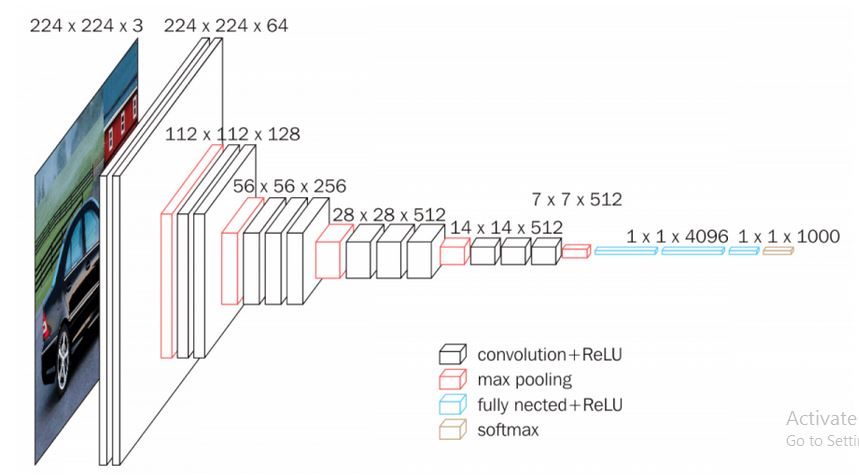
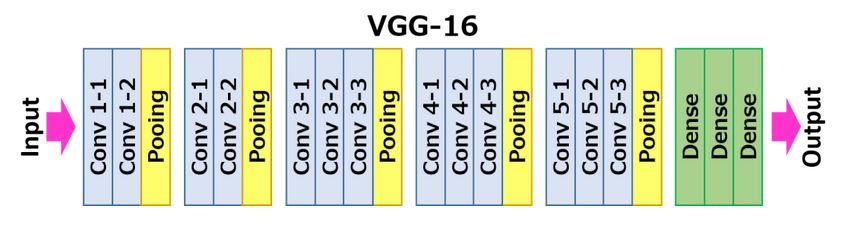

Nguồn ảnh: https://machinelearningknowledge.ai/keras-implementation-of-vgg16-architecture-from-scratch-with-dogs-vs-cat-data-set/

# **Khởi tạo Model VGG16**

In [ ]:
# Khởi tạo Object Sequential để lưu Model
# Khởi tạo Model VGG16
# Conv2D : Convolutional 2D layer 
# 224: Số lượng kernel
# (3,3): Size của kernel
def VGG16():
  model = Sequential()
  
  # Block 1
  # Conv 1-1
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", input_shape = input_shape, activation = "relu", kernel_initializer='he_uniform'))
  # Conv 1-2
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Max Pooling 1
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # Block 2
  # Conv 2-1
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Conv 2-2
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Max Pooling 2
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # Block 3
  # Conv 3-1
  model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Conv 3-2
  model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Conv 3-3
  model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Max Pooling 3
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # Block 4
  # Conv 4-1
  model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Conv 4-2
  model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Conv 4-3
  model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Max Pooling 4
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # Block 5
  # Conv 5-1
  model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Conv 5-2
  model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Conv 5-3
  model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu", kernel_initializer='he_uniform'))
  # Max Pooling 3
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  # Dense Block
  model.add(Flatten(name='flatten'))
  model.add(Dense(4096, activation = 'relu', name = 'fc1'))
  model.add(Dense(4096, activation = 'relu', name = 'fc2'))
  model.add(Dense(1, activation = 'sigmoid', name = 'output'))

  return model

In [ ]:
model = VGG16()

In [ ]:
# Khởi tạo EarlyStopping để dừng quá trình train nếu như val_accuracy không thay đổi đáng kể
# hoặc giảm trong 3 lần liên tiếp
early_stopping = EarlyStopping(
    monitor = 'val_accuracy', 
    mode = 'auto',
    verbose = 1, 
    patience = 3
    )

In [ ]:
# Lưu toàn bộ model và weight sau mỗi epoch
model_checkpoint = ModelCheckpoint(
    filepath = "./checkpoint.h5",
    monitor = 'val_accuracy', 
    save_best_only = True, 
    mode = 'auto'
    )

callbacks = [early_stopping, model_checkpoint]

In [ ]:
# Thuật toán optimizer
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile (
    loss = "binary_crossentropy", 
    optimizer = opt,
    metrics = ["accuracy"]
  )

# **Kiểm tra Model**

In [ ]:
model.summary()

# Training

In [ ]:
# Số lần train
epochs = 2
# Số step của tập training trong mỗi epoch
steps_per_epoch = len(train_generator)
# Số step của tập validation trong mỗi epoch
validation_steps = len(validation_generator)

In [ ]:
# Tiến hành quá trình training
history = model.fit_generator(
    generator = train_generator,
    validation_data = validation_generator,
    epochs = epochs,
    steps_per_epoch = steps_per_epoch,
    validation_steps = validation_steps,
    callbacks = callbacks,
    verbose = 1
    )

# Visualize accuracy và loss
Sử dụng để visualize sau khi train xong model

Không dùng nếu load save model vào

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())

# Visualize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Visualize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# **Predict test set**

***Load model đang có sẵn***

Uncomment nếu cần sử dụng

In [ ]:
model = load_model("../input/modelcheckpoint/final_model.h5")

In [ ]:
import matplotlib.pyplot as plt
import random
import pandas as pd

from tensorflow.keras.preprocessing import image

# Ghi sampleSubmission.csv
df = pd.read_csv("../input/my-dogs-vs-cats/my-dogs-vs-cats/sampleSubmission.csv")
def updateValue(df: pd.DataFrame, id: int, value: str):
    df.loc[df['id'] == id, "label"] = value

# Predict dir
predict_dir_path = "../input/my-dogs-vs-cats/my-dogs-vs-cats/test"
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
random.shuffle(onlyfiles)

dog_counter = 0 
cat_counter  = 0
counter = 0
times = 100

# Predict
for file, counter in zip(onlyfiles, range(times)):
    img = image.load_img(predict_dir_path + "/" + file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = classes[0][0]
    
    id = str(file).split(".")
    id = int(id[0])
    
    if classes == 0:
      updateValue(df, id, "cat")
    
      if cat_counter < 100:
          plt.title("cat")
          plt.imshow(img)
          plt.show()

      cat_counter += 1
    
    else:
      updateValue(df, id, "dog")
    
      if dog_counter < 100:
          plt.title("dog")
          plt.imshow(img)
          plt.show()

      dog_counter += 1

df.to_csv("./sampleSubmission.csv", index = False)
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

In [ ]:
df = pd.read_csv("./sampleSubmission.csv")
print(df.loc[df["label"] == "dog"].to_string(index = False))
print("-------------------------")
print(df.loc[df["label"] == "cat"].to_string(index = False))